In [21]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Importing helpful libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from PIL import Image
import os
print(os.listdir("/Users/milindpathiyal/Desktop/stanford-car-dataset-by-classes-folder/"))

['.DS_Store', 'car_data', 'anno_test.csv', 'names.csv', 'anno_train.csv']


In [15]:
os.listdir("/Users/milindpathiyal/Desktop/stanford-car-dataset-by-classes-folder/car_data/car_data")

['.DS_Store', 'test', 'train']

In [16]:
#Making seperate variables for train and test directories
train_dir = "/Users/milindpathiyal/Desktop/stanford-car-dataset-by-classes-folder/car_data/car_data/train"
test_dir = "/Users/milindpathiyal/Desktop/stanford-car-dataset-by-classes-folder/car_data/car_data/test"

In [18]:
#Dictionary that has name of car class as key and image name as its values
car_names_train = {}

for i in os.listdir(train_dir):
    car_names_train[i] = os.listdir(train_dir + '/' + i)

In [19]:
#Code to create two lists for class name and image directories corresponding to it
car_images_ls = []
car_names_ls = []
car_classes = []
car_directories = []

for i in car_names_train:
    car_classes.append(i)

for i,j in enumerate(car_names_train.values()):
    for img in j:
        car_images_ls.append(img)
        car_names_ls.append(car_classes[i])
        
for i in range(len(car_names_ls)):
    car_directories.append(train_dir + '/' + car_names_ls[i] + '/' + car_images_ls[i])

Text(0.5, 1.0, 'Acura TSX Sedan 2012')

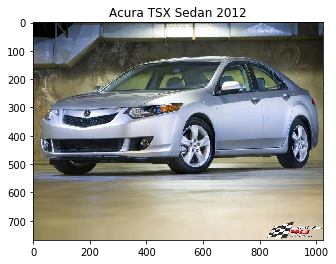

In [22]:
#Sample image to check the consistency of the two lists
plt.imshow(Image.open(car_directories[1000]))
plt.title(car_names_ls[1000])

In [23]:
#Creating a data frame from the above two lists
df = pd.DataFrame(data = [car_directories, car_names_ls], index = ["Directories", "Car Class"]).T
df.head()
df.to_csv('car_names_directories.csv', index = False)

In [25]:
#Importing various modules from the Keras Library that are used in Deep Learning
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import densenet
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers

Using TensorFlow backend.


In [26]:
#Pre-Defining some hyper-parameters
img_width, img_height = 256, 256
nb_train_samples = 8144
nb_validation_samples = 8041
epochs = 10
steps_per_epoch = 256
batch_size = 64
n_classes = 196

In [27]:
#Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./ 255,
    zoom_range=0.2,
    rotation_range = 8,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [30]:
#Creating the Convolution Neural Network
cnn = Sequential()
cnn.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Dropout(0.22))
cnn.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Dropout(0.22))
cnn.add(Conv2D(filters = 64, kernel_size = (4,4), padding = 'same', activation = 'relu', input_shape = (256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters = 96, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Flatten())
cnn.add(Dropout(0.18))
cnn.add(Dense(512, activation = 'relu'))
cnn.add(Dense(512, activation = 'relu'))
cnn.add(Dense(196, activation = 'sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
#Let's take a look at the CNN we created
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 256, 16)      1216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 32)      12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)       

In [32]:
#Training begins here
model_history = cnn.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch = steps_per_epoch,
    validation_steps = nb_validation_samples // batch_size)

cnn.save_weights('stanford_cars_folder_cnn_weights.h5')

Epoch 1/10
256/256 [==============================] - 1549s 6s/step - loss: 5.2813 - accuracy: 0.0071 - val_loss: 5.2762 - val_accuracy: 0.0085
Epoch 2/10
256/256 [==============================] - 1561s 6s/step - loss: 5.2769 - accuracy: 0.0083 - val_loss: 5.2812 - val_accuracy: 0.0084
Epoch 3/10
256/256 [==============================] - 1477s 6s/step - loss: 5.2763 - accuracy: 0.0083 - val_loss: 5.2672 - val_accuracy: 0.0081
Epoch 4/10
256/256 [==============================] - 1503s 6s/step - loss: 5.2748 - accuracy: 0.0083 - val_loss: 5.2661 - val_accuracy: 0.0089
Epoch 5/10
256/256 [==============================] - 1485s 6s/step - loss: 5.2743 - accuracy: 0.0083 - val_loss: 5.2890 - val_accuracy: 0.0085
Epoch 6/10
256/256 [==============================] - 1469s 6s/step - loss: 5.2748 - accuracy: 0.0083 - val_loss: 5.2676 - val_accuracy: 0.0081
Epoch 7/10
256/256 [==============================] - 1469s 6s/step - loss: 5.2744 - accuracy: 0.0083 - val_loss: 5.2836 - val_accuracy:

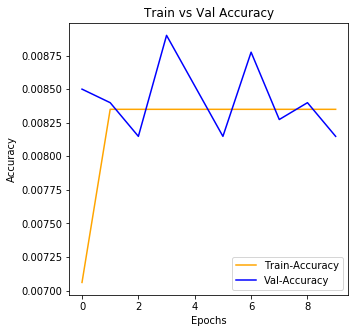

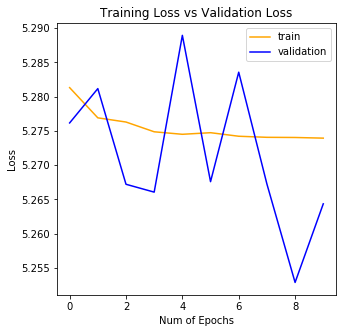

In [35]:
#Visualization of how validation and training set performs per epoch
plt.figure(0, figsize = (5,5))
plt.plot(model_history.history['accuracy'],'orange')
plt.plot(model_history.history['val_accuracy'],'blue')
plt.legend(['Train-Accuracy','Val-Accuracy'])
_ = plt.title('Train vs Val Accuracy')
_ = plt.xlabel('Epochs')
_ = plt.ylabel('Accuracy')

plt.figure(1, figsize = (5,5))
plt.plot(model_history.history['loss'],'orange')
plt.plot(model_history.history['val_loss'],'blue')
plt.legend(['train','validation'])
_ = plt.xlabel("Num of Epochs")
_ = plt.ylabel("Loss")
_ = plt.title("Training Loss vs Validation Loss")

In [36]:
#"""TO OVERFIT THE MODEL"""
#As there is insufficient images per class (40-45 images per set for 196 classes) to get satisfactory
#results, I overfitted the model to perform best on the training set
model_history = cnn.fit_generator(
    train_generator,
    epochs=epochs + 20,
    validation_data=validation_generator,
    steps_per_epoch = steps_per_epoch,
    validation_steps = nb_validation_samples // batch_size)

cnn.save_weights('stanford_cars_folder_cnn_weights_OVERFITTED.h5')

Epoch 1/30
256/256 [==============================] - 1780s 7s/step - loss: 5.2740 - accuracy: 0.0083 - val_loss: 5.2487 - val_accuracy: 0.0085
Epoch 2/30
256/256 [==============================] - 1668s 7s/step - loss: 5.2739 - accuracy: 0.0083 - val_loss: 5.2763 - val_accuracy: 0.0085
Epoch 3/30
256/256 [==============================] - 1631s 6s/step - loss: 5.2738 - accuracy: 0.0083 - val_loss: 5.2561 - val_accuracy: 0.0084
Epoch 4/30
256/256 [==============================] - 1466s 6s/step - loss: 5.2739 - accuracy: 0.0083 - val_loss: 5.2630 - val_accuracy: 0.0084
Epoch 5/30
256/256 [==============================] - 1797s 7s/step - loss: 5.2738 - accuracy: 0.0083 - val_loss: 5.2470 - val_accuracy: 0.0086
Epoch 6/30
256/256 [==============================] - 1617s 6s/step - loss: 5.2738 - accuracy: 0.0083 - val_loss: 5.2797 - val_accuracy: 0.0080
Epoch 7/30
256/256 [==============================] - 1619s 6s/step - loss: 5.2737 - accuracy: 0.0083 - val_loss: 5.2663 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
#Visualization of Validation and training set performance after overfitting
plt.figure(0, figsize = (5,5))
plt.plot(model_history.history['accuracy'],'orange')
plt.plot(model_history.history['val_accaccuracy'],'blue')
plt.legend(['Train-Accuracy','Val-Accuracy'])
_ = plt.title('Train vs Val Accuracy (OVERFITTED)')
_ = plt.xlabel('Epochs')
_ = plt.ylabel('Accuracy')

plt.figure(1, figsize = (5,5))
plt.plot(model_history.history['loss'],'orange')
plt.plot(model_history.history['val_loss'],'blue')
plt.legend(['train','validation'])
_ = plt.xlabel("Num of Epochs")
_ = plt.ylabel("Loss")
_ = plt.title("Training Loss vs Validation Loss (OVERFITTED)")